# **O QUE JÁ FAZ:**
-RAG funcionando lindamente
-Geração de Respostas
-Busca na Web
-Citações corretas!

# **O que Falta:**
- Cálculo de Métricas;
- Formatação com o nome dos arquivos entregáveis (talvez pegar essas células e usar no vscode);
- Fazer a interface mais Simples: Interface inicial dizendo que tiramos dúvidas sobre TDAH + Espaço para o usuário fazer Perguntas +Espaço da Resposta.
- Fazer o Read.ME

**PDF USADO: **
https://drive.google.com/file/d/125iNbSXhMir59ebmqRUihftKjTVpTby-/view?usp=sharing

In [ ]:
!pip install -U -q langgraph langchain langchain-community langchain-google-genai pypdf langchain-huggingface sentence-transformers faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 17.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently tak


- Google Gemini API Key: https://aistudio.google.com/app/apikey?hl=pt-br

In [ ]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GOOGLE_API_KEY")

GOOGLE_API_KEY: ··········


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0)

Upload do PDF

In [ ]:
from google.colab import files
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]

Saving livro tdah.pdf to livro tdah.pdf


In [ ]:
from langchain import hub
from langchain_community.document_loaders import PyPDFLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict

loader = PyPDFLoader('livro tdah.pdf')
docs = loader.load()


In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = FAISS.from_documents(all_splits, embedding=embeddings)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
!pip install -U ddgs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 100.5 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.4.0
    Uninstalling lxml-5.4.0:
      Successfully uninstalled lxml-5.4.0


In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_community.tools import DuckDuckGoSearchResults
from typing import List, TypedDict
from langchain.schema import Document

web_search = DuckDuckGoSearchResults(num_results=3)
prompt = hub.pull("rlm/rag-prompt")

class State(TypedDict):
    question: str
    context: List[Document]
    answer: str
    used_web: bool
    is_off_topic: bool

def retrieve(state: State):
    # Primeiro, verifica se a pergunta é sobre TDAH ou temas relacionados
    topic_keywords = ["TDAH", "ADHD", "déficit de atenção", "hiperatividade",
                     "transtorno atenção", "neurodesenvolvimento", "psiquiatria",
                     "mental health", "saúde mental", "neurodivergência", "autismo", "tdah", "ritalina", "venvanse"]

    question_lower = state["question"].lower()
    is_about_tdah = any(keyword.lower() in question_lower for keyword in topic_keywords)

    if not is_about_tdah:
        return {"context": [], "used_web": False, "is_off_topic": True}

    # Se for sobre TDAH, busca no vectorstore
    retrieved_docs = vectorstore.similarity_search(state["question"])

    if not retrieved_docs:
        web_results = web_search.run(state["question"])

        web_docs = []
        for i, res in enumerate(web_results.split("\n")):
            if res.strip():
                parts = res.split(" - ")
                content = res
                metadata = {"source": "web", "search_result": f"result_{i+1}"}

                if len(parts) >= 2:
                    content = parts[0]
                    metadata["url"] = parts[-1]

                web_docs.append(Document(page_content=content, metadata=metadata))

        return {"context": web_docs, "used_web": True, "is_off_topic": False}
    else:
        return {"context": retrieved_docs, "used_web": False, "is_off_topic": False}

def generate(state: State):
    if state.get("is_off_topic", False):
        # Para perguntas fora do escopo, resposta simples sem fontes
        messages = [
            SystemMessage(content="Você é um assistente especializado em TDAH. Para perguntas fora deste escopo, responda de forma geral sem citar fontes específicas."),
            HumanMessage(content=f"Pergunta: {state['question']}\n\nPor favor, responda de forma geral, já que esta pergunta não está relacionada ao TDAH.")
        ]
        response = llm.invoke(messages)
        return {"answer": response.content}

    # Prepara o contexto com fontes (apenas para perguntas sobre TDAH)
    context_with_sources = []
    for i, doc in enumerate(state["context"]):
        source_info = ""
        if "url" in doc.metadata:
            source_info = f" [Fonte: {doc.metadata['url']}]"
        elif "source" in doc.metadata and doc.metadata["source"] == "web":
            source_info = f" [Fonte: Resultado de busca {i+1}]"
        elif "page" in doc.metadata:
            source_info = f" [Fonte: PDF p.{doc.metadata.get('page', 'N/A')}]"

        context_with_sources.append(f"{doc.page_content}{source_info}")

    docs_content = "\n\n".join(context_with_sources)
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

def self_check(state: State):
    # Se for off-topic, não faz verificação de fontes
    if state.get("is_off_topic", False):
        return state

    answer = state["answer"]

    # Verifica se já contém informações de fonte
    has_sources = any(keyword in answer for keyword in
                     ["Fonte:", "http://", "https://", "p.", "página", "fonte:", "source:"])

    if has_sources:
        return state
    else:
        # Busca específica para fontes confiáveis sobre TDAH
        search_query = f"{state['question']} site:.edu OR site:.gov OR site:.org OR site:.research OR site:.scielo.br"
        web_results = web_search.run(search_query)

        web_docs = []
        for i, res in enumerate(web_results.split("\n")):
            if res.strip():
                parts = res.split(" - ")
                content = res
                metadata = {"source": "web_verification", "result_type": "source_validation"}

                if len(parts) >= 2:
                    content = f"Informação de validação: {parts[0]}"
                    metadata["validation_url"] = parts[-1]
                    metadata["source_number"] = i + 1

                web_docs.append(Document(page_content=content, metadata=metadata))

        # Prepara contexto com ênfase em fontes
        verification_context = "\n\n".join(
            f"{doc.page_content} [Fonte de verificação: {doc.metadata.get('validation_url', 'Busca web')}]"
            for doc in web_docs
        )

        # Prompt específico para incluir fontes
        source_prompt = """
        Você forneceu uma resposta sobre TDAH, mas precisa incluir fontes confiáveis.
        Use as informações abaixo para adicionar referências à sua resposta.

        Pergunta original: {question}

        Sua resposta inicial: {initial_answer}

        Informações para citação:
        {context}

        Por favor, revise sua resposta incluindo fontes confiáveis (URLs quando disponível).
        Use formato: [Fonte: URL ou descrição da fonte]
        """

        messages = [
            SystemMessage(content="Você é um assistente especializado em TDAH que sempre cita fontes confiáveis."),
            HumanMessage(content=source_prompt.format(
                question=state["question"],
                initial_answer=state["answer"],
                context=verification_context
            ))
        ]

        response = llm.invoke(messages)
        return {"answer": response.content, "context": state["context"] + web_docs}

# Configuração do grafo
graph_builder = StateGraph(State)
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("generate", generate)
graph_builder.add_node("self_check", self_check)

graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "generate")
graph_builder.add_edge("generate", "self_check")

graph = graph_builder.compile()

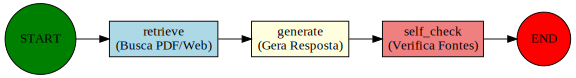

In [ ]:
from IPython.display import Image, display
import tempfile
import os
import graphviz

dot = graphviz.Digraph()
dot.attr(rankdir='LR', size='8,5')

dot.node('start', 'START', shape='circle', style='filled', fillcolor='green')
dot.node('retrieve', 'retrieve\n(Busca PDF/Web)', shape='box', style='filled', fillcolor='lightblue')
dot.node('generate', 'generate\n(Gera Resposta)', shape='box', style='filled', fillcolor='lightyellow')
dot.node('self_check', 'self_check\n(Verifica Fontes)', shape='box', style='filled', fillcolor='lightcoral')
dot.node('end', 'END', shape='circle', style='filled', fillcolor='red')

dot.edge('start', 'retrieve')
dot.edge('retrieve', 'generate')
dot.edge('generate', 'self_check')
dot.edge('self_check', 'end')

display(dot)

In [ ]:
response = graph.invoke({"question": "Você poderia me ajudar dizendo o que é TDAH?"})
print(response["answer"])

TDAH (Transtorno do Déficit de Atenção com Hiperatividade) é uma condição que se caracteriza pela ocorrência de desatenção, hiperatividade e impulsividade [Fonte: Crianças com TDAH em Contato com a Natureza, https://www.scielo.br/j/edreal/a/xJd4QkXcqYnPt5RMLG8GdgG/].

Essas características causam dificuldades subjacentes em atrasar a resposta ao ambiente, na motivação e no funcionamento executivo. Indivíduos com TDAH enfrentam desafios em ambientes que exigem que fiquem quietos, sigam instruções e pensem antes de agir.

Essas dificuldades resultam em sintomas e prejuízos que podem ser abordados com intervenções comportamentais, acadêmicas e de autorregulação, frequentemente incluindo terapia e, em alguns casos, medicamentos [Fonte: Crianças com TDAH em Contato com a Natureza, https://www.scielo.br/j/edreal/a/xJd4QkXcqYnPt5RMLG8GdgG/].


In [ ]:
response = graph.invoke({"question": "Quais os principais sintomas do TDAH?"})
print(response["answer"])

Os principais sintomas do TDAH são desatenção e hiperatividade/impulsividade. Existem 18 sintomas principais do TDAH, que se enquadram nessas três categorias [Fonte: Teste mental, https://www.testes-online.org/blog/tdah-phda/caracteristicas-de-pessoas-com-tdah/].

Os sintomas de desatenção podem incluir dificuldade em prestar atenção a detalhes, cometer erros por descuido, ter dificuldade em seguir instruções, perder objetos com frequência e ser facilmente distraído [Fonte: Teste mental, https://www.testes-online.org/blog/tdah-phda/caracteristicas-de-pessoas-com-tdah/].

Estes sintomas podem ser graves durante a infância e evoluir ao longo da vida.


In [ ]:
response = graph.invoke({"question": "Qual o CID do TDAH? Quais medicações mais usadas?"})
print(response["answer"])

O CID (Classificação Internacional de Doenças) específico para o TDAH não foi fornecido nas informações apresentadas. No entanto, para o diagnóstico de TDAH, o DSM-5 (Manual Diagnóstico e Estatístico de Transtornos Mentais) estabelece que crianças devem exibir "seis ou mais sintomas no domínio da desatenção ou hiperatividade-impulsividade, ou ambos" [Fonte: https://pt.wikipedia.org/wiki/Transtorno_do_déficit_de_atenção_com_hiperatividade_em_adultos].

Quanto às medicações mais usadas, alguns exemplos incluem a Atomoxetina, que é um inibidor seletivo da recaptação de noradrenalina, e a Viloxazina, que atua como um inibidor seletivo da recaptação [Fonte: https://pt.wikipedia.org/wiki/Tratamento_do_transtorno_do_déficit_de_atenção_e_hiperatividade]. É importante ressaltar que o uso dessas medicações para ganho de desempenho em estudos, trabalho ou para ter mais energia em festas não é aconselhado [Fonte: https://dralucianarego.com.br/tdah-adulto-15-caracteristicas/].


In [ ]:
#Aqui a gente consegue ver que o self check tá funcioanando bem direitinho

response = graph.invoke({"question": "De que ano é a cartilha do TDAH??"})
print(response["answer"])

Com base nas informações fornecidas, não há menção específica sobre o ano de publicação de uma "cartilha do TDAH". As fontes disponíveis abordam a complexa história e evolução do conceito do Transtorno do Déficit de Atenção e Hiperatividade (TDAH), suas definições, controvérsias e abordagens de tratamento ao longo do tempo [Fonte: Transtorno do déficit de atenção e hiperatividade, Wikipedia: https://pt.wikipedia.org/wiki/Transtorno_do_déficit_de_atenção_e_hiperatividade; RSD Journal: https://rsdjournal.org/index.php/rsd/article/download/25604/22316/297798; SciELO: https://www.scielo.br/j/pc/a/NxLRxjMQHvFyvGR8wp7dHdr/?format=html]. No entanto, elas não detalham a data de uma cartilha específica.


In [ ]:
# ehhehehheeh teste
response = graph.invoke({"question": "Quem é João Victor Cosme?"})
print(response["answer"])

Não tenho informações específicas sobre quem é João Victor Cosme. Meu conhecimento é geral e não inclui detalhes sobre indivíduos específicos.


In [ ]:
response = graph.invoke({"question": "Que profissional devo procurar se suspeitar que tenho TDAH?"})
print(response["answer"])

Se você suspeita que tem TDAH, deve procurar um médico ou psicólogo. O cuidado com o TDAH geralmente envolve uma equipe multidisciplinar, que pode incluir médico, psicólogo, fonoaudiólogo e educadores, conforme o caso [Fonte: Instituto Singular, https://institutosingular.org/blog/tdah/].
